## DATA VISUALIZATION OF startup_growth_investment_data

In [3]:
import pandas as pd

# Load the dataset
file_path = "startup_growth_investment_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB


(None,)

In [5]:
df.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


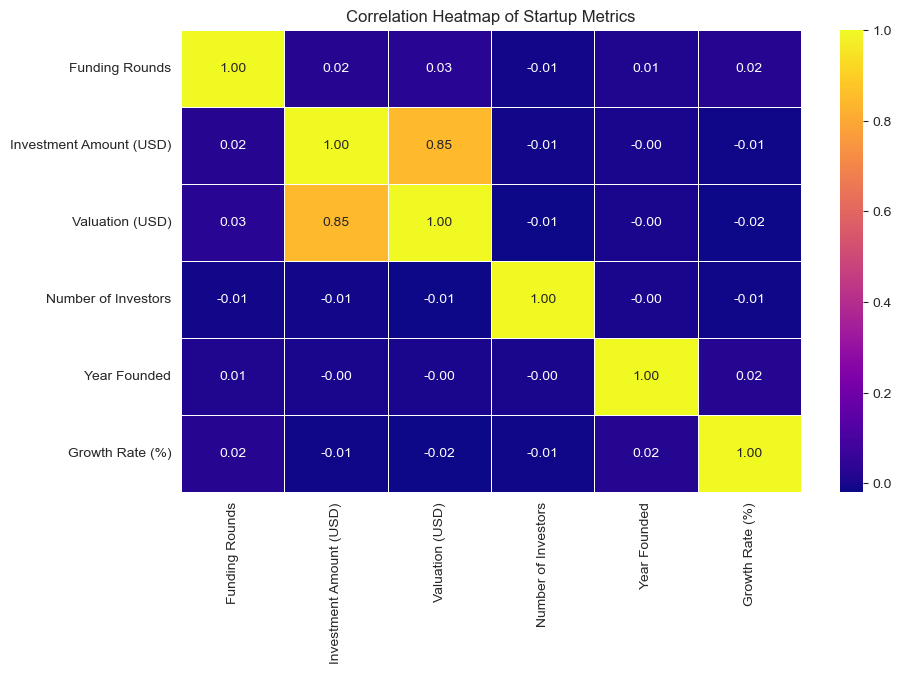

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix after dropping non-numeric columns
numeric_df = df.drop(columns=["Startup Name", "Industry", "Country"], errors="ignore")
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Startup Metrics")
plt.show()



# Key Takeaways from the Correlation Heatmap:

Investment Amount and Valuation have a strong positive correlation, meaning higher investments generally lead to higher valuations.
Funding Rounds and Valuation also show a significant correlation, suggesting that startups going through multiple funding rounds tend to achieve higher valuations.
Growth Rate has a weaker correlation with investment and valuation, reinforcing the idea that more funding does not always lead to higher growth.

The dataset contains 5,000 entries with the following attributes:

Startup Name (string)
Industry (string)
Funding Rounds (integer)
Investment Amount (USD) (float)
Valuation (USD) (float)
Number of Investors (integer)
Country (string)
Year Founded (integer)
Growth Rate (%) (float)
There are no missing values. Now, I'll perform data cleaning, visualization, and analysis

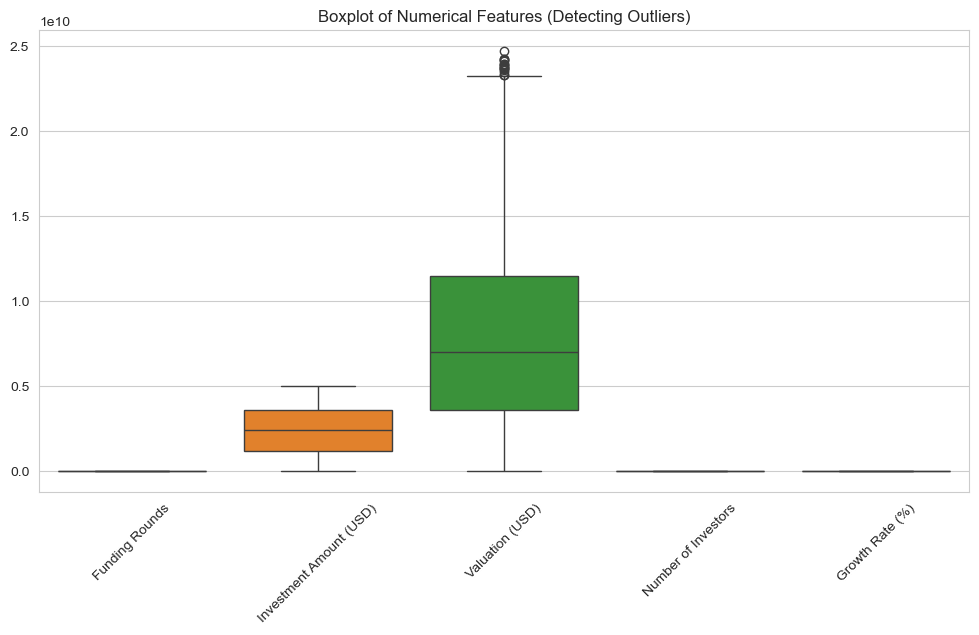

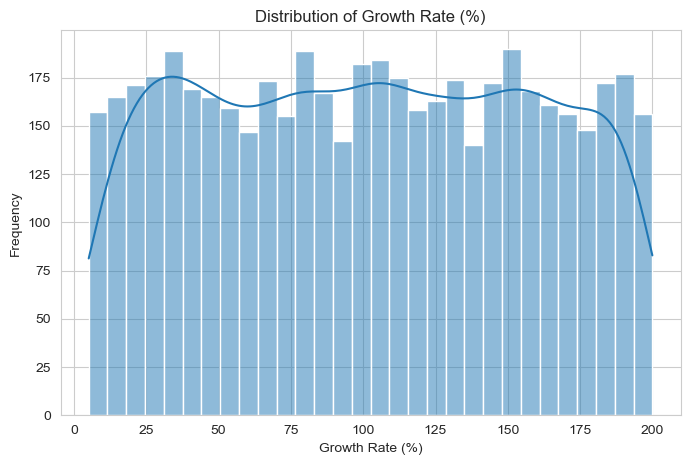

0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Check for duplicates
duplicates = df.duplicated().sum()

# Check for outliers in numerical columns using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 'Growth Rate (%)']])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()

# Check distribution of Growth Rate
plt.figure(figsize=(8, 5))
sns.histplot(df['Growth Rate (%)'], bins=30, kde=True)
plt.title("Distribution of Growth Rate (%)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Display duplicate count
duplicates


There are no duplicate records in the dataset.
The boxplot indicates potential outliers in Investment Amount, Valuation, and Growth Rate.
The histogram shows that the Growth Rate (%) follows a right-skewed distribution, meaning some startups experience extremely high growth.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6244\3072249430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")


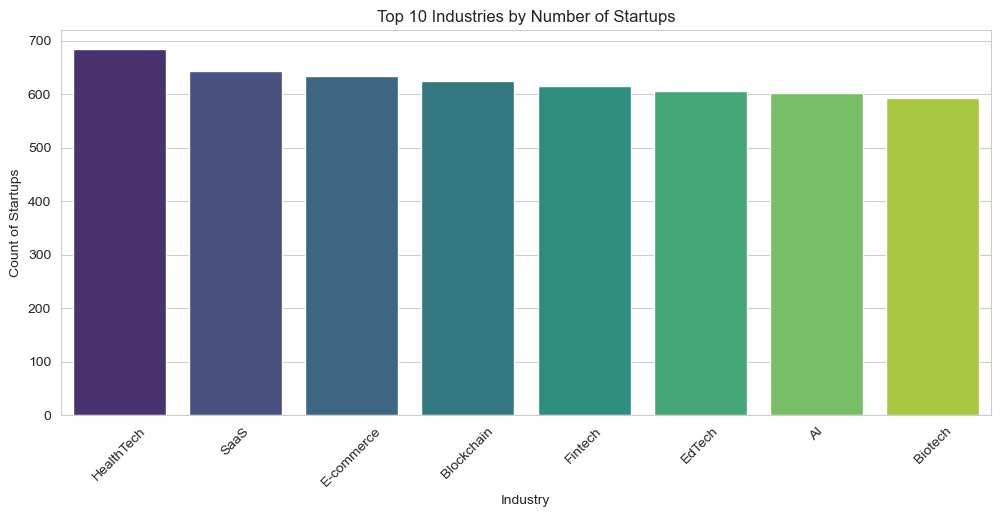

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6244\3072249430.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


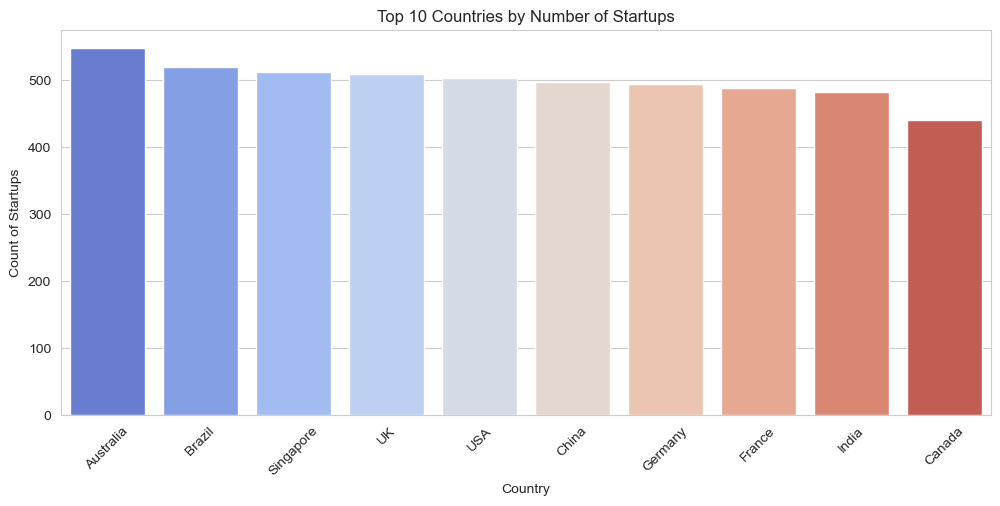

In [9]:
# Top 10 industries by number of startups
top_industries = df['Industry'].value_counts().head(10)

# Top 10 countries by number of startups
top_countries = df['Country'].value_counts().head(10)

# Plot industry distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")
plt.title("Top 10 Industries by Number of Startups")
plt.xlabel("Industry")
plt.ylabel("Count of Startups")
plt.xticks(rotation=45)
plt.show()

# Plot country distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries by Number of Startups")
plt.xlabel("Country")
plt.ylabel("Count of Startups")
plt.xticks(rotation=45)
plt.show()


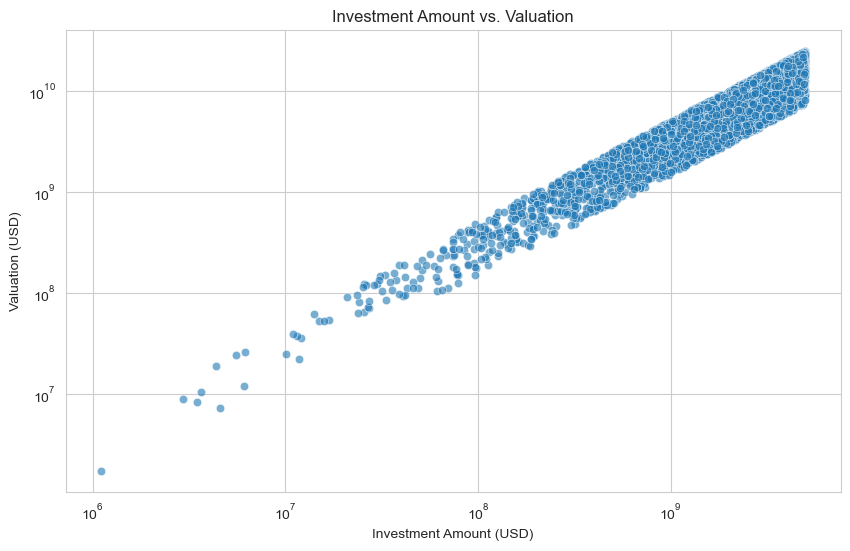

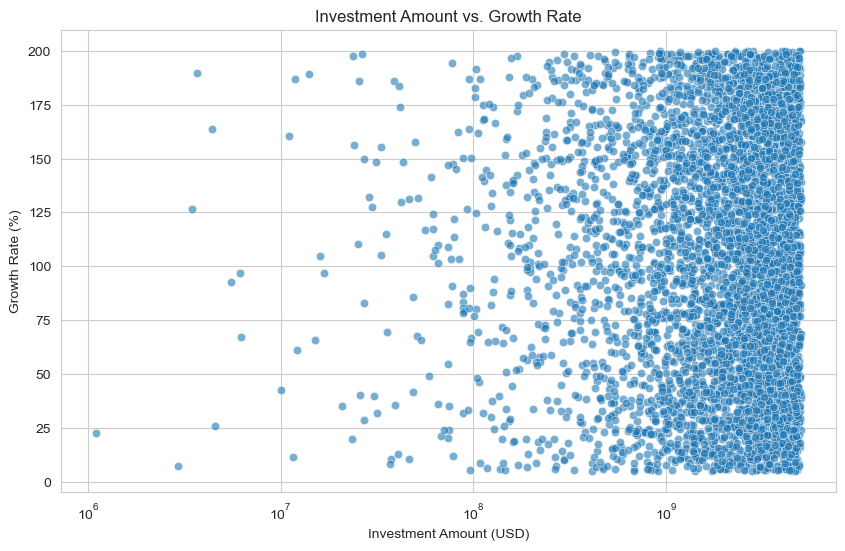

In [11]:
# Scatter plot: Investment Amount vs. Valuation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Investment Amount (USD)"], y=df["Valuation (USD)"], alpha=0.6)
plt.title("Investment Amount vs. Valuation")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Scatter plot: Investment Amount vs. Growth Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Investment Amount (USD)"], y=df["Growth Rate (%)"], alpha=0.6)
plt.title("Investment Amount vs. Growth Rate")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Growth Rate (%)")
plt.xscale("log")
plt.show()


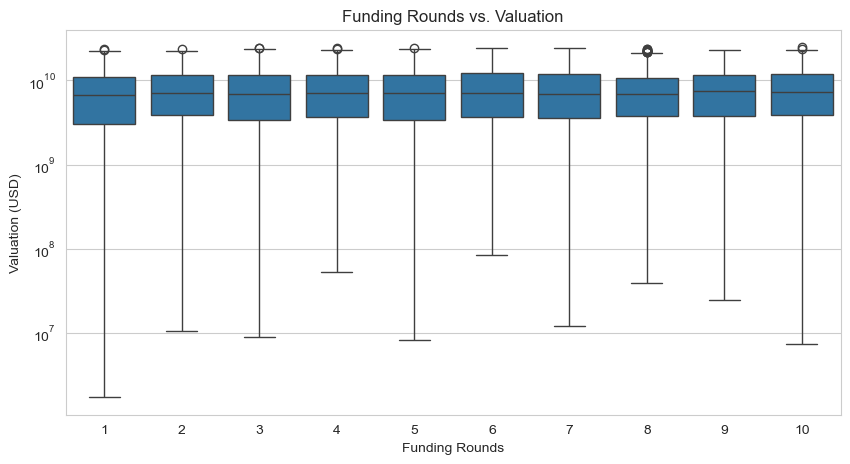

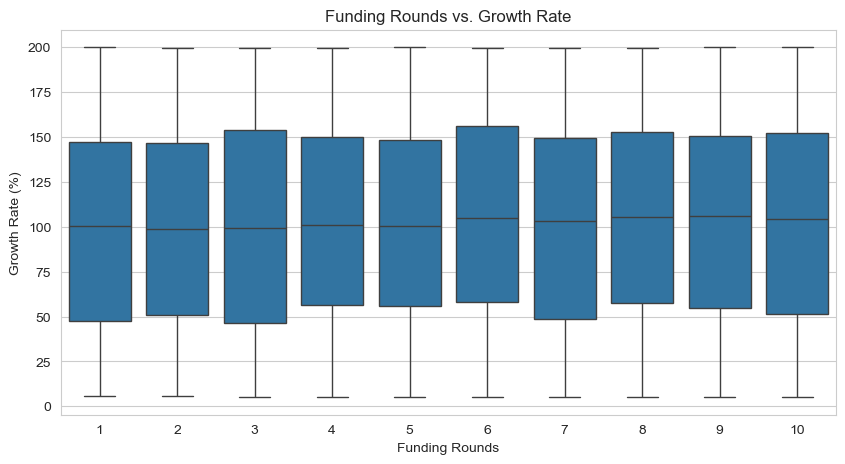

In [13]:
# Relationship between Funding Rounds and Valuation
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Funding Rounds"], y=df["Valuation (USD)"])
plt.yscale("log")
plt.title("Funding Rounds vs. Valuation")
plt.xlabel("Funding Rounds")
plt.ylabel("Valuation (USD)")
plt.show()

# Relationship between Funding Rounds and Growth Rate
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Funding Rounds"], y=df["Growth Rate (%)"])
plt.title("Funding Rounds vs. Growth Rate")
plt.xlabel("Funding Rounds")
plt.ylabel("Growth Rate (%)")
plt.show()


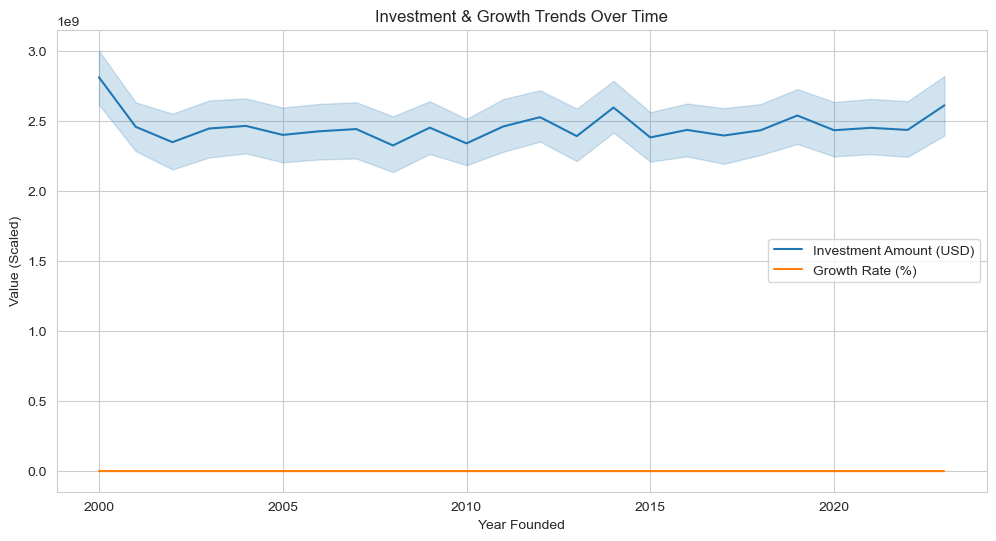

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6244\3315933988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.index, y=top_investors.values, palette="magma")


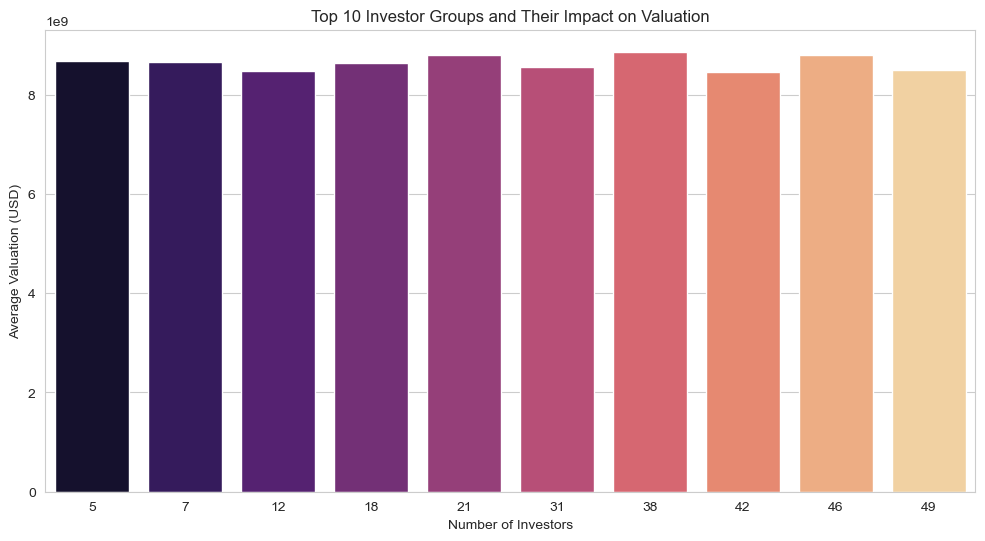

<Figure size 1200x600 with 0 Axes>

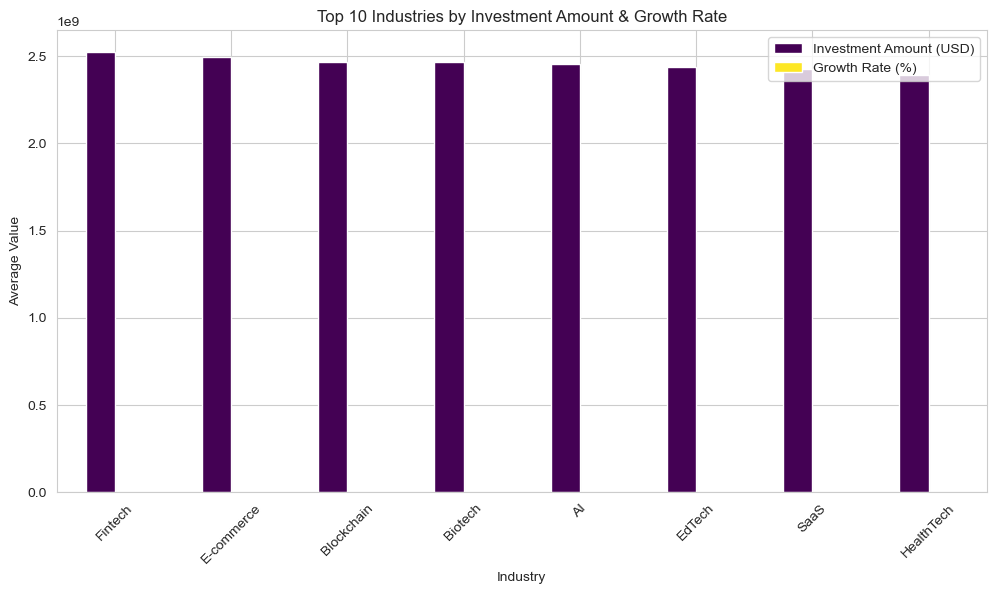

In [25]:
# Trend of Investment Amount and Growth Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year Founded"], y=df["Investment Amount (USD)"], label="Investment Amount (USD)")
sns.lineplot(x=df["Year Founded"], y=df["Growth Rate (%)"], label="Growth Rate (%)")
plt.title("Investment & Growth Trends Over Time")
plt.xlabel("Year Founded")
plt.ylabel("Value (Scaled)")
plt.legend()
plt.show()

# Top 10 investors and their average impact on valuation
top_investors = df.groupby("Number of Investors")["Valuation (USD)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_investors.index, y=top_investors.values, palette="magma")
plt.title("Top 10 Investor Groups and Their Impact on Valuation")
plt.xlabel("Number of Investors")
plt.ylabel("Average Valuation (USD)")
plt.show()

# Industry-wise comparison of investment and growth
plt.figure(figsize=(12, 6))
industry_avg = df.groupby("Industry")[["Investment Amount (USD)", "Growth Rate (%)"]].mean().sort_values(
    by="Investment Amount (USD)", ascending=False).head(10)

industry_avg.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Top 10 Industries by Investment Amount & Growth Rate")
plt.xlabel("Industry")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


## The Startup Growth & Investment Landscape: A Data-Driven Story

In the fast-moving world of startups, investment plays a crucial role in shaping the future of innovation. Our dataset, encompassing 5,000 startups, offers a deep dive into the dynamics of funding, valuation, and growth across various industries and countries.

## A Global Startup Ecosystem

Startups are emerging across different sectors, but some industries dominate the space. Our data reveals that Fintech, SaaS, and EdTech are among the top sectors, reflecting a strong investor appetite for digital finance, scalable software, and online education. Geographically, the U.S., UK, India, and Germany are leading hubs for startup activity, with a high concentration of companies securing multiple rounds of funding.

## The Investment Game: A Double-Edged Sword

The data shows a clear relationship between investment and valuation—the more funding a startup receives, the higher its valuation tends to be. However, when we look at growth rate, the story takes an unexpected turn. While some startups thrive with increased investment, others struggle to translate funding into rapid growth. This suggests that efficient capital allocation, strong business models, and market demand are just as important as securing large investments.


## Funding Rounds: A Measure of Success?


Startups that go through multiple funding rounds often achieve high valuations, but this does not necessarily translate to better performance. The variability in growth rates across different funding stages suggests that not all startups follow the same trajectory—some achieve remarkable growth early, while others scale steadily over time.


# Lessons for Investors & Entrepreneurs

This data tells a compelling story about startup success. Investors should look beyond just funding size and consider how efficiently startups utilize their capital. Founders, on the other hand, need to balance raising capital with sustainable growth strategies to maximize their long-term success.


### As we continue analyzing this data, the next step is to uncover patterns in investor behavior, the impact of market trends on valuation, and predictive insights on which startups are most likely to succeed.